# Import libraries

In [3]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

path = "./img/download.png"


# Checkered Board

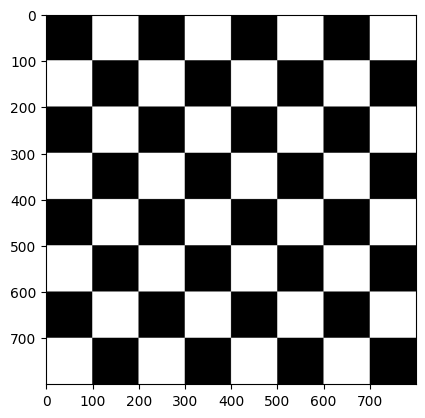

In [16]:
def create_chess_board(W, h, rows, cols):
    # Tạo một mảng 2 chiều với kích thước rows x cols và đặt giá trị xen kẽ 0 và 1
    board = np.zeros((rows, cols))
    board[1::2, ::2] = 1
    board[::2, 1::2] = 1
    
    # Tạo một mảng 2 chiều với kích thước h x W
    img = np.zeros((h, W), dtype=np.uint8)
    # Tính toán kích thước của mỗi ô cờ
    square_height = h // rows
    square_width = W // cols
    
    # Lặp qua các hàng và cột, tô màu trắng cho các ô có giá trị 1
    for i in range(rows):
        for j in range(cols):
            if board[i, j] == 1:
                img[i * square_height:(i + 1) * square_height, j * square_width:(j + 1) * square_width] = 255
    return img

# Hiển thị hình ảnh
plt.imshow(create_chess_board(800, 800, 8, 8), cmap='gray')
plt.show()


# Color Corection

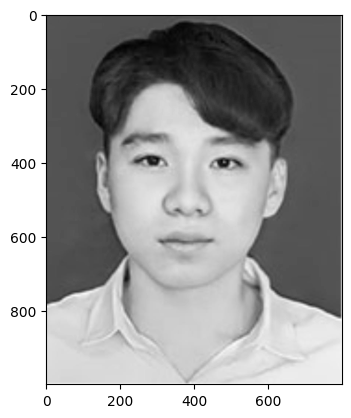

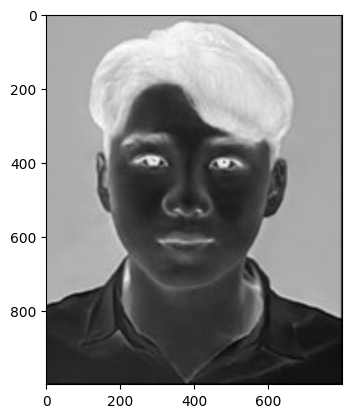

In [5]:
import cv2
import matplotlib.pyplot as plt

def grayscale_image(path):
    """Đọc hình ảnh grayscale từ đường dẫn và đảo ngược màu sắc."""
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return img

def color_orection(img):
    """Đảo ngược màu sắc của hình ảnh."""
    return 255 - img
def display_image(img, cmap="gray"):
    plt.imshow(img, cmap=cmap)
    plt.show()

display_image(grayscale_image(path))
display_image(color_orection(grayscale_image(path)))


# Rotate image

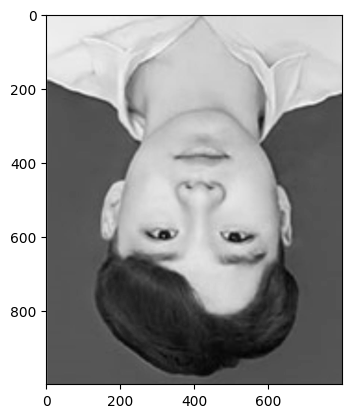

In [6]:
def rotate_image(image):
    """
    Xoay ngược hình ảnh 180 độ bằng vòng lặp for.
    
    Tham số:
    image (numpy.ndarray): Hình ảnh dưới dạng mảng numpy.
    
    Trả về:
    numpy.ndarray: Hình ảnh sau khi xoay ngược 180 độ.
    """

    # Lấy kích thước của hình ảnh
    h, w = image.shape[:2]

    # Tạo một mảng rỗng để lưu trữ hình ảnh đã xoay
    rotated = np.zeros_like(image)

    for i in range(h):
        for j in range(w):
            rotated[h - 1 - i, w - 1 - j] = image[i, j]

    return rotated

img = rotate_image(grayscale_image(path= path))
display_image(img)


# Color Separation

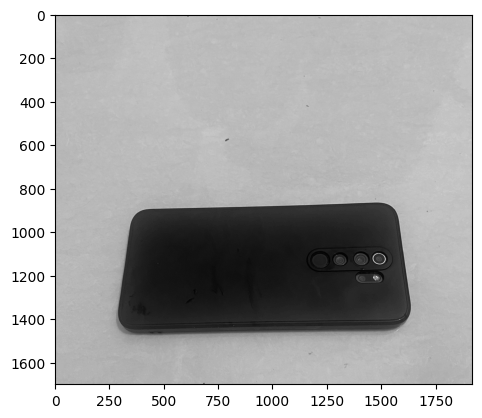

In [7]:
pathv2 = "./img/imagev2.jpg"
imgv2 = grayscale_image(path= pathv2)
display_image(imgv2)


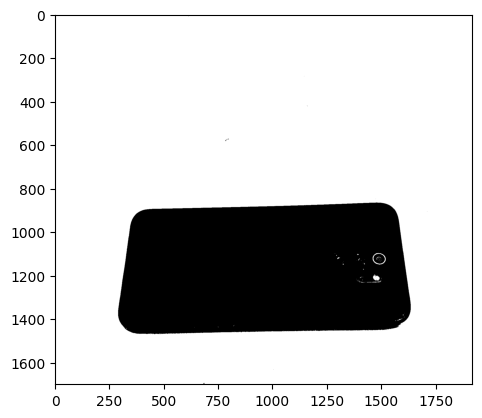

In [8]:
def separate_object(img, threshold_value=80):
    """
    Tách đối tượng từ hình ảnh đen trắng sử dụng phương pháp ngưỡng (threshold) với vòng lặp for.
    """    
    # Lấy kích thước của hình ảnh
    h, w = img.shape
    
    # Tạo một mảng rỗng để lưu trữ hình ảnh sau khi áp dụng ngưỡng
    thresholded_image = np.zeros((h, w), dtype=np.uint8)
    
    for i in range(h):
        for j in range(w):
            if img[i, j] > threshold_value:
                thresholded_image[i, j] = 255
            else:
                thresholded_image[i, j] = 0
    
    return thresholded_image

display_image(separate_object(imgv2), cmap='gray')



# Corner Line

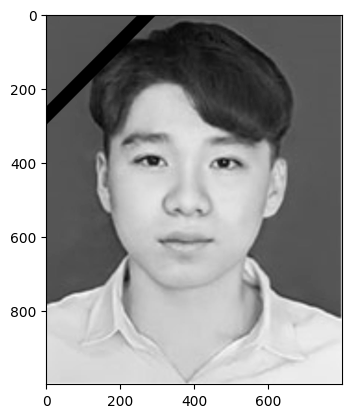

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def draw_black_line(img, line_length=300, line_thickness=50):
    h, w = img.shape
    
        # Vòng lặp để thay đổi các pixel và tạo ra đường thẳng đen
    for j in range(min(line_length, h)):  # Giới hạn j trong phạm vi của ảnh
        for k in range(line_thickness):  # Độ dày của đường thẳng
            x = line_length - j + k - line_thickness
            if 0 <= x < w:  # Đảm bảo x nằm trong phạm vi hợp lệ
                img[j, x] = 0  # Đặt pixel thành màu đen
            
            
    return img

img = grayscale_image(path=path)
img_with_line = draw_black_line(img)

plt.imshow(img_with_line, cmap='gray')
plt.show()


# Gradient

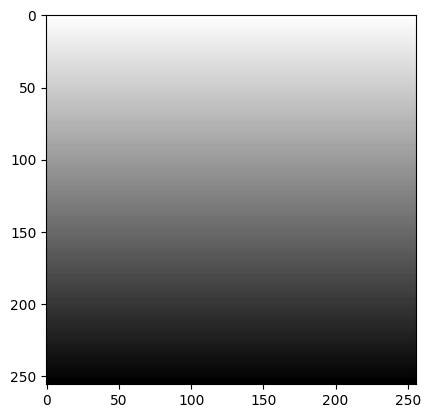

In [10]:
def create_gradient_image(w, h):
    """
    Tạo một hình ảnh có gradient từ trắng đến đen sử dụng vòng lặp for.
    
    Tham số:
    - w (int): Chiều rộng của hình ảnh.
    - h (int): Chiều cao của hình ảnh.
    
    Trả về:
    - gradient_image (numpy.ndarray): Hình ảnh với gradient từ trắng đến đen.
    """
    # Tạo một mảng rỗng để lưu trữ hình ảnh gradient
    gradient_image = np.zeros((h, w), dtype=np.uint8)
    
    # Sử dụng vòng lặp for để tạo gradient
    for i in range(h):
        # Tính giá trị màu cho mỗi hàng (từ 255 đến 0)
        color_value = int(255 * (1 - i / (h - 1)))
        
        # Gán giá trị màu cho toàn bộ hàng
        gradient_image[i, :] = color_value
    
    return gradient_image

w, h = 256, 256
gradient_img = create_gradient_image(w, h)
plt.imshow(gradient_img, cmap='gray', vmin=0, vmax=255)
plt.show()


# Letter B

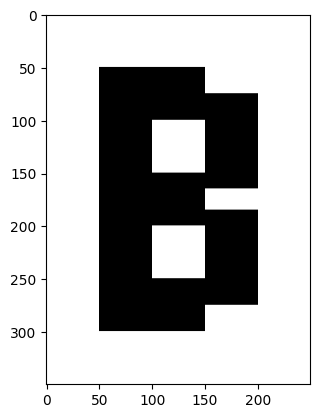

In [11]:
def draw_letter_b_numpy(height=350, width=250):

    img = np.ones((height, width), dtype=np.uint8) * 255
    # Vẽ đường dọc của chữ B
    for i in range(50, 300):
        for j in range(50, 50 + 50):
                img[i, j] = 0
    # Vẽ đường ngang của chữ B
    for i in range(50, 100):
        for j in range(100, 150):
            img[i, j] = 0
    
    for i in range(150, 200):
        for j in range(100, 150):
            img[i, j] = 0
                
    for i in range(250, 300):
        for j in range(100, 150):
            img[i, j] = 0
    # Vẽ đường dọc cuối của chữ B            
    for i in range(75, 165):
        for j in range(150, 200):
            img[i, j] = 0
            
    for i in range(185, 275):
        for j in range(150, 200):
            img[i, j] = 0
            
    plt.imshow(img, cmap='gray')
    plt.show()
    

draw_letter_b_numpy()


# Find secret by subtract

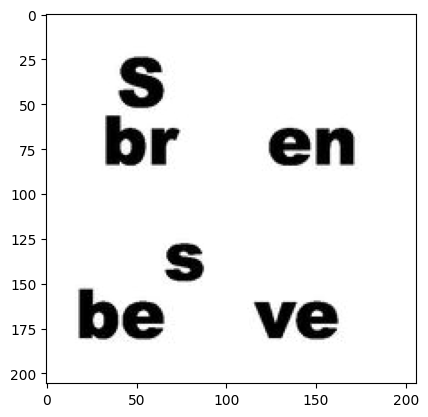

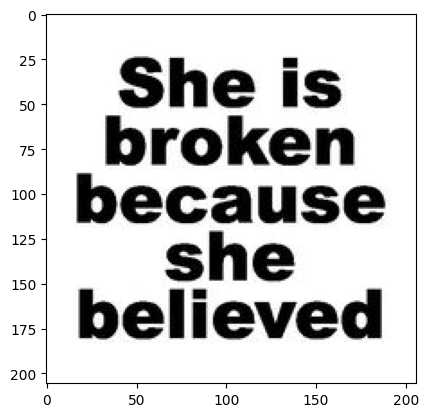

In [12]:
pathv3 = "./img/imgfinal1.jpg"
img = grayscale_image(pathv3)
pathv4 = "./img/imgfinal2.jpg"
img2 = grayscale_image(pathv4)

display_image(img)
display_image(img2)

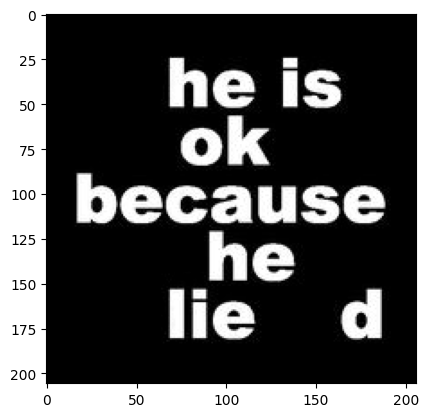

In [13]:
def subtract_img(img1,img2):
    if img1.shape != img2.shape:
        raise ValueError("Hai hình ảnh phải có cùng kích thước")
    
    result = img1.astype(np.int16) - img2.astype(np.int16)
    
    result = np.clip(result, 0, 255)
    
    return result.astype(np.uint8)

display_image(subtract_img(img,img2))